In [1]:
import pandas as pd
import numpy as np

import scipy
# from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [2]:
# read CSV
df=pd.read_csv("unifed_csv_without_duplicated_company.csv")
df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37198 entries, 0 to 37197
Data columns (total 132 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_uuid                      37198 non-null  object 
 1   country_code                      33609 non-null  object 
 2   region                            33609 non-null  object 
 3   city                              33609 non-null  object 
 4   operating                         37198 non-null  int64  
 5   closed                            37198 non-null  int64  
 6   success                           37198 non-null  int64  
 7   success_acquired                  37198 non-null  int64  
 8   success_ipo                       37198 non-null  int64  
 9   num_funding_rounds                12036 non-null  float64
 10  total_funding_usd                 9093 non-null   float64
 11  founded_on                        37198 non-null  float64
 12  las

In [3]:
keep_col = ['operating', 'closed', 'success', 'Financial Services', 'FinTech', 'Blockchain', 'Cryptocurrency', 'fund_rd_raised_amount_usd', 'investment_count', 'any_partner', 'event_count', 'job_duration', 'gender_male', 'gender_female', 'degree_type', 'subject_Computer Science', 'subject_Economics', 'subject_Finance', 'USA', 'GBR', 'CHN', 'city_London', 'city_New_York', 'city_San_Francisco', 'ROI', 'mean_norm_amount_delta', 'roi_from_mean_momentum']
df = df[keep_col]

In [4]:
df['fund_rd_raised_amount_usd_log'] = np.log(df['fund_rd_raised_amount_usd'])

In [5]:
df.dropna(subset=['ROI'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3644 entries, 10 to 37197
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   operating                      3644 non-null   int64  
 1   closed                         3644 non-null   int64  
 2   success                        3644 non-null   int64  
 3   Financial Services             3644 non-null   int64  
 4   FinTech                        3644 non-null   int64  
 5   Blockchain                     3644 non-null   int64  
 6   Cryptocurrency                 3644 non-null   int64  
 7   fund_rd_raised_amount_usd      3246 non-null   float64
 8   investment_count               3644 non-null   float64
 9   any_partner                    3644 non-null   float64
 10  event_count                    3644 non-null   float64
 11  job_duration                   3280 non-null   float64
 12  gender_male                    3644 non-null  

[]

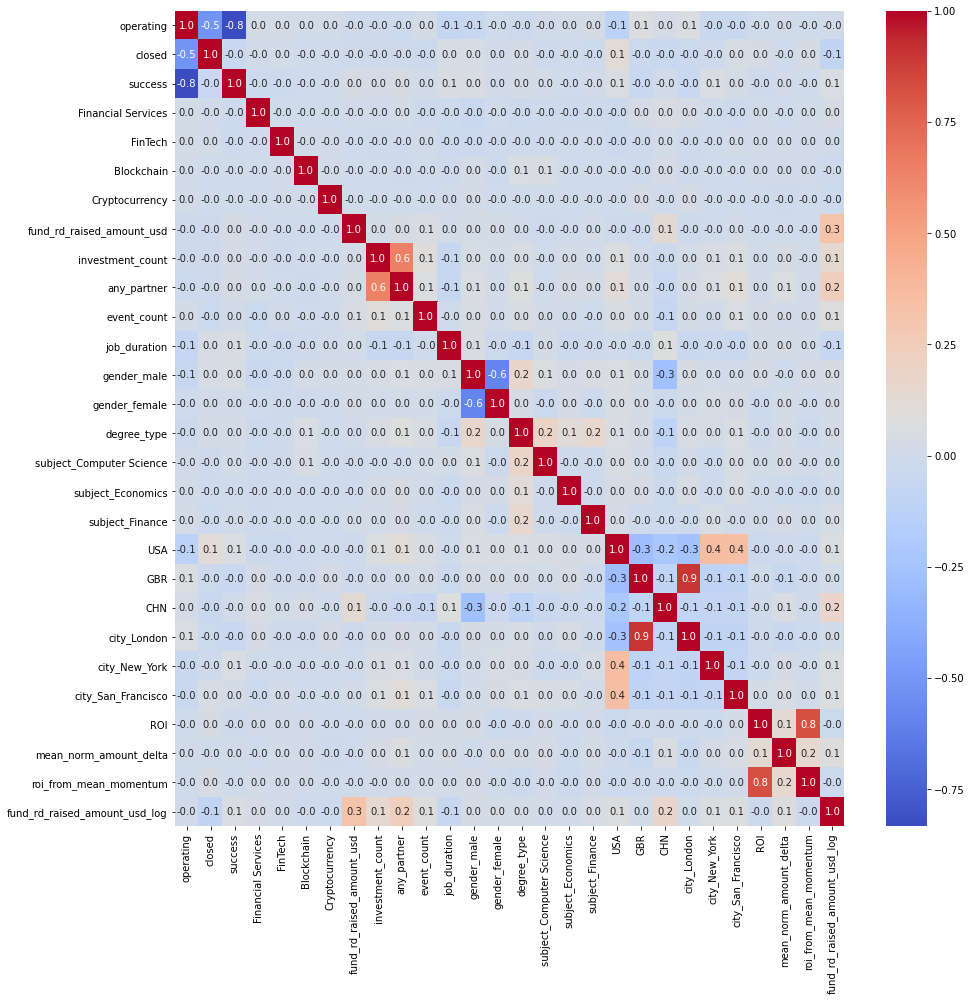

In [6]:
corrmat = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(df[corrmat.index].corr(), annot=True, fmt='.1f', cmap='coolwarm')
# sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.plot()